In [6]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [7]:
batch_size = 32
num_classes = 10
epochs = 3

img_rows, img_cols = 32, 32
img_channels = 3

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print('Train samples: {}'.format(X_train.shape[0]))
print('Test samples: {}'.format(X_test.shape[0]))

Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Train samples: 50000
Test samples: 10000


In [3]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.fit(
    X_train, Y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, Y_test),
    shuffle=True,
    verbose=1
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 513s - loss: 1.5279 - acc: 0.4421 - val_loss: 1.1581 - val_acc: 0.5856

In [8]:
model.evaluate(X_test, Y_test)

10000/10000 [==============================] - 31s     

[0.90055635347366336, 0.68579999999999997]

10/10 [==============================] - 0s


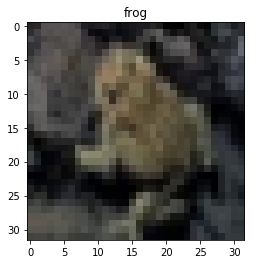

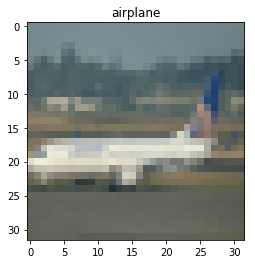

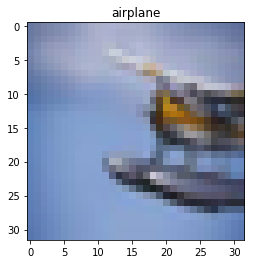

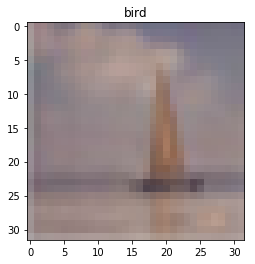

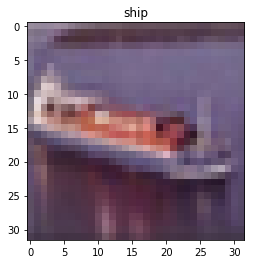

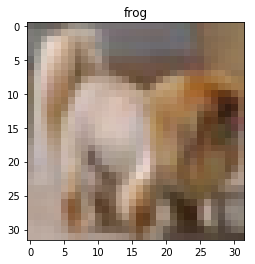

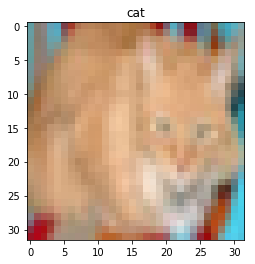

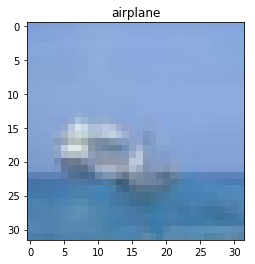

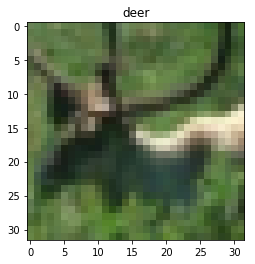

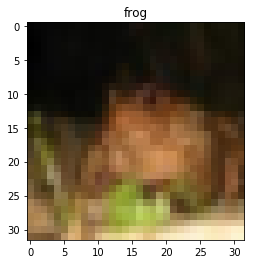

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline


cifar_classes = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]

images = random.sample(list(X_test), 10)
predictions = model.predict_classes(np.array(images).reshape((10, 32, 32, 3)))

for image, prediction in zip(images, predictions):    
    plt.figure()
    plt.title(cifar_classes[prediction])
    plt.imshow(image)
